In [32]:
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

In [33]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

Unknown System


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

In [35]:
cancer = load_breast_cancer()

In [36]:
# n_features : 변수의 개수
# feature_names : 변수의 이름 
# model : 모델 
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)



GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [39]:
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [40]:
# model : 모델
# n_features : feature(변수의 개수)
# feature_names : 특성의 이름
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)        

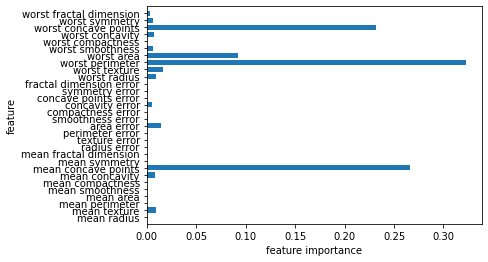

In [42]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1, learning_rate=  0.1)

gbrt.fit(X_train, y_train)

feature_num = X_train.shape[1]
feature_names = cancer.feature_names

plot_feature_important_up(gbrt, feature_num, feature_names)

In [43]:
import pandas as pd
import seaborn as sns

In [44]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

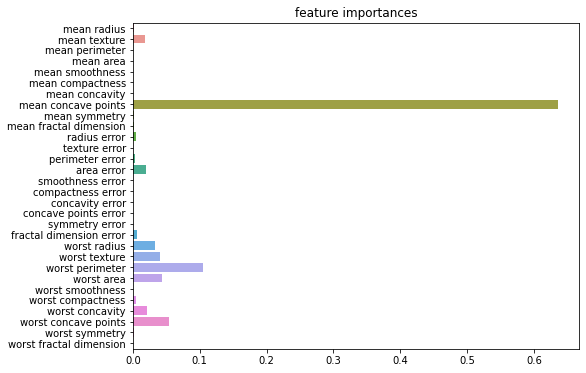

In [45]:
fea_imp_values = gbrt.feature_importances_
importances = pd.Series(fea_imp_values, index=feature_names)

plt.figure(figsize=(8,6))
plt.title('feature importances')
sns.barplot(x=importances, y=importances.index)